# Problema
Clasificación de Clientes según su Perfil Financiero

## Descripción del Problema
Una institución financiera desea clasificar a sus clientes en tres categorías basándose en su perfil financiero y de comportamiento:
Riesgo Bajo: Clientes que cumplen con todos los pagos a tiempo y tienen ingresos estables.
Riesgo Medio: Clientes con retrasos esporádicos en los pagos o ingresos variables.
Riesgo Alto: Clientes con historial de impagos o ingresos inestables.

### Características de Entrada:
Historial de pagos: Porcentaje de pagos realizados a tiempo (normalizado entre 0 y 1).
Ingresos mensuales: Ingresos promedio del cliente (normalizado entre 0 y 1).
Relación deuda-ingreso: Proporción entre la deuda total y los ingresos totales (normalizado entre 0 y 1).
Categorías de Salida:
`Riesgo Bajo`: [1, 0, 0]
`Riesgo Medio`: [0, 1, 0]
`Riesgo Alto`: [0, 0, 1]

Conjunto de Datos de Entrenamiento
Historial de pagos	Ingresos mensuales	Relación deuda-ingreso	Resultado
0.9	0.8	0.2	[1, 0, 0]
0.7	0.6	0.5	[0, 1, 0]
0.4	0.4	0.8	[0, 0, 1]
0.8	0.9	0.3	[1, 0, 0]
0.5	0.7	0.6	[0, 1, 0]
0.3	0.5	0.9	[0, 0, 1]
Actividades
Implementar una red neuronal multicapa para clasificar los clientes según su riesgo.
Encontrar los valores óptimos para los pesos `w1`, `w2` 'wn' y el sesgo `b` mediante entrenamiento.
Graficar la frontera de decisión que separa los clientes .


¿Son los datos linealmente separables?
¿Qué ajustes podrían hacer al modelo para mejorar la clasificación?
Describir cada una de las partes del modelo implementando

In [6]:
# Uso de librerias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Datos de entrenamiento y etiquetas definidas

In [7]:
clientes = np.array([
    [0.9, 0.8, 0.2],
    [0.7, 0.6, 0.5],
    [0.4, 0.4, 0.8],
    [0.8, 0.9, 0.3],
    [0.5, 0.7, 0.6],
    [0.3, 0.5, 0.9]
])

categorias = np.array([
    [1, 0, 0],  
    [0, 1, 0], 
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Generación del modelo en base a phaser anterior mediante la definición de una red neuronal

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(6, input_dim=3, activation='relu')) 
modelo.add(Dense(6, activation='relu'))             
modelo.add(Dense(3, activation='softmax'))       
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Red neuronal inicializada.")


Red neuronal inicializada.


c:\Users\Guido\Desktop\Devs\IA\guidod-IA\entrenamientoPlantas\plantvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Recolección de los datos inicializados al principio

In [9]:
# Simulamos la recolección de datos financieros
def recolectar_datos(clientes, categorias):
    print("Recolectando datos...")
    for i, cliente in enumerate(clientes):
        print(f"Cliente {i + 1}: Historial={cliente[0]}, Ingresos={cliente[1]}, Deuda-Ingreso={cliente[2]}, Categoría={categorias[i]}")

recolectar_datos(clientes, categorias)

Recolectando datos...
Cliente 1: Historial=0.9, Ingresos=0.8, Deuda-Ingreso=0.2, Categoría=[1 0 0]
Cliente 2: Historial=0.7, Ingresos=0.6, Deuda-Ingreso=0.5, Categoría=[0 1 0]
Cliente 3: Historial=0.4, Ingresos=0.4, Deuda-Ingreso=0.8, Categoría=[0 0 1]
Cliente 4: Historial=0.8, Ingresos=0.9, Deuda-Ingreso=0.3, Categoría=[1 0 0]
Cliente 5: Historial=0.5, Ingresos=0.7, Deuda-Ingreso=0.6, Categoría=[0 1 0]
Cliente 6: Historial=0.3, Ingresos=0.5, Deuda-Ingreso=0.9, Categoría=[0 0 1]


## Entrenamiento del modelo con fit

In [10]:

modelo.fit(clientes, categorias, epochs=500, verbose=0)
print("Entrenamiento completado.")


Entrenamiento completado.


## Pruebas de predicción mediante el modelo ya entrenado 

In [15]:
#Simulación de un nuevo cliente como si lo ingresaramos al arreglo
nuevo_cliente = np.array([[0.4, 0.4, 0.9]])
prediccion = modelo.predict(nuevo_cliente)
#Muestreo de las predicciones de cada categoria para tomar la mas alta
categoria = np.argmax(prediccion)
print(f'Predicciones desglozadas: {prediccion}')
#Definición de nombres de las clases numericas
nombres_categorias = ["Riesgo Bajo", "Riesgo Medio", "Riesgo Alto"]
print(f"Predicción para el nuevo cliente: {nombres_categorias[categoria]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicciones desglozadas: [[0.00125124 0.17298624 0.82576245]]
Predicción para el nuevo cliente: Riesgo Alto


## Graficación de los datos con frontera de decisión

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


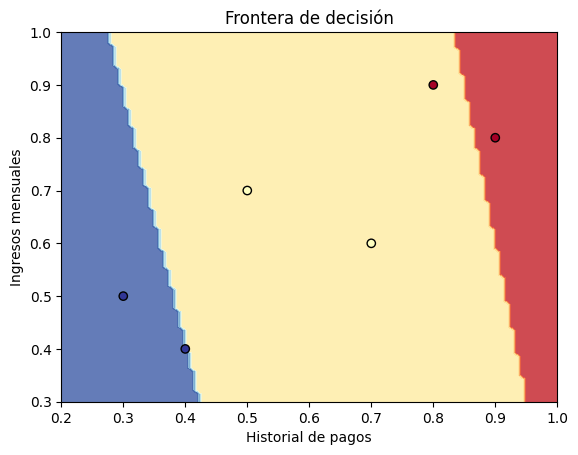

In [16]:
import matplotlib.pyplot as plt

# Gráfica de la frontera de decisión
def frontera_decision(model, data, labels):
    x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, 0.5)]

    predicciones = model.predict(grid)
    predicciones = np.argmax(predicciones, axis=1)
    predicciones = predicciones.reshape(xx.shape)

    plt.contourf(xx, yy, predicciones, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(data[:, 0], data[:, 1], c=np.argmax(labels, axis=1), edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.xlabel("Historial de pagos")
    plt.ylabel("Ingresos mensuales")
    plt.title("Frontera de decisión")
    plt.show()

frontera_decision(modelo, clientes, categorias)


## Preguntas finales
### ¿Son los datos linealmente separables?
Segun la frontera de decisión vista anteriormente no parece ser que sean linealmente separables pues estan dispersos y muestran transiciones entre las clases

### ¿Qué ajustes podrían hacer al modelo para mejorar la clasificación?
En este caso tiene muy pocos ejemplos, se tendria que entrenar con muchos mas datos para que el modelo sea capaz de generalizar


### Describir cada una de las partes del modelo implementando
Esto ya se encuentra explicado mediante los markdowns anteriores y los comentarios en el codigo 

